![logo](../../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# Assessing Fire Radiative Power (FRP) in Amazon Wildfire Events to Support Forest Management and Climate Assessments.

Production date: 09-10-2025

Produced by: Vitor Miranda (CoLAB +ATLANTIC)

## 🌍 Use case: A study on Fire Radiative Power (FRP) events

## ❓ Quality assessment question
* **Are Sentinel-3 FRP observations able to capture the spatial patterns and reliability of Amazon Basin wildfires?**

```{admonition} These are the key outcomes of this assessment
:class: note

In this Use Case, we will access the Fire Radiative Power (FRP) between 2020-2025 (i.e. Jan-2020 until Feb-2025) derived from satellite observations from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S). The grid-scale product of this dataset, including information on Fire Radiative Power (FRP, MW) and Active-Fires (AF, counts), will be used to quantify the intensity and spatial distribution of biomass burning events across the Area of Interest (AoI).

The analysis will focus on the period of 2022–2023–2024, with particular attention to the seasonal and spatial variability of Fire Radiative Power (FRP) across the Amazon basin, which will allow for a clearer understanding of the magnitude of fire events during this timeframe. Although the C3S FRP product provides global coverage, recent “State of Wildfires” reports (e.g. [[1]](https://essd.copernicus.org/articles/16/3601/2024/essd-16-3601-2024-discussion.html) and [[2]](https://essd.copernicus.org/preprints/essd-2025-483/)) have consistently identified the Amazon Basin as one of the regions showing the most pronounced fire anomalies worldwide. The moist tropical forests of South America, exhibited some of the highest departures from long-term averages, including exceptional increases in burned area, FRP, and associated carbon emissions. The previous studies highlight that Amazonia has transitioned into a major hotspot of high-intensity fires, where extreme events—often linked to extreme events and land-use pressures—have far-reaching impacts on carbon budgets, ecosystem resilience, and regional climate. Focusing on the Amazon Basin therefore allows the global C3S product to be applied to a region where fire intensity is changing rapidly and where improvements in understanding FRP dynamics are particularly urgent and societally relevant.

The results provided here will be compared with the findings reported in the previous referenced studies, i.e. [[1]](https://essd.copernicus.org/articles/16/3601/2024/essd-16-3601-2024-discussion.html), [[2]](https://essd.copernicus.org/preprints/essd-2025-483/) and also a particular one related to droughts: [[3]](https://doi.org/10.3390/rs16142519), allowing for an evaluation of the dataset’s consistency and performance relative to previously documented fire patterns over the region.
```

Here is the main question that this use question expect to answer:

1) Is the C3S product able to reproduce the patterns and magnitudes of FRP and AF dynamics reported in the cited studies?

## 📢 Quality assessment statement

* The dataset demonstrates physical consistency when compared among the different peer-reviewed studies. Specifically, our analysis shows that there is consistent signals across years and seasons.

* The results of this notebook also show that the spatial resolution is sufficient to detect finer active-fires, and the temporal resolution is adequate to understand patterns over time.

* The C3S dataset records higher magnitudes of active fires than the State of Wildfires reference, likely due to finer spatial resolution and better sensitivity to smaller or shorter fires; fire counts are highly correlated between datasets with consistent temporal patterns.

## 📋 Methodology

**[](satellite_satellite-fire-radiative-power_completeness_q03:code-section-1)**

**[](satellite_satellite-fire-radiative-power_completeness_q03:code-section-2)**

**[](satellite_satellite-fire-radiative-power_completeness_q03:code-section-3)**
* Satellite-derived Fire Radiative Power (FRP) and Active Fire (AF) pixel datasets from 2020 to 2025 were used to assess seasonal spatial patterns of fire activity across Amazonia and adjacent regions. Seasonal aggregations were performed for December–January–February (DJF), March–April–May (MAM), June–July–August (JJA), and September–October–November (SON) to compare fire activity spatially within and across years. Spatial comparison utilized standardized anomalies where possible, acknowledging temporal mismatches between the C3S dataset and [[3]](https://doi.org/10.3390/rs16142519) reference.

**[](satellite_satellite-fire-radiative-power_completeness_q03:code-section-4)**
* Time series of active fire counts and FRP values were computed to identify consistent fire signals. Cross-dataset comparisons examined temporal correlation and magnitude differences, against state-of-wildfires dataset [[2]](https://essd.copernicus.org/preprints/essd-2025-483/) reference. Specific regions such as Bolivia, and Amazonas state were considered.

**[](satellite_satellite-fire-radiative-power_completeness_q03:code-section-5)**
* High-temporal-resolution daily fire pixel counts were analyzed to identify peak fire days within targeted subregion such as Western Amazonia. Daily aggregation across spatial dimensions (latitude, longitude) yielded time series of daily active fire pixel counts, from which peak days and their ranks were extracted. Comparisons to referenced state-of-wildfires dataset [[1]](https://essd.copernicus.org/articles/16/3601/2024/essd-16-3601-2024-discussion.html) were made.

**[](satellite_satellite-fire-radiative-power_completeness_q03:code-section-6)**

## 📈 Analysis and results

(satellite_satellite-fire-radiative-power_completeness_q03:code-section-1)=
### 1. Data Overview, download and Area of Interest (AoI) definition

#### Import all the libraries/packages

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [4]:
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import regionmask
from rasterio import features
import xarray as xr
from c3s_eqc_automatic_quality_control import download, plot, utils
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import matplotlib.dates as mdates
from shapely.geometry import box
from matplotlib.colors import ListedColormap
import warnings
import matplotlib.image as mpimg
import requests, zipfile, io
from matplotlib.patches import Patch
from IPython.display import Markdown, display
import matplotlib.colors as mcolors
import matplotlib.cm as cm

plt.style.use("seaborn-v0_8-notebook")

#### Search for data
To search for data, visit the CDS website: http://cds.climate.copernicus.eu Here you can search for FRP data using the search bar. The data we need for this tutorial is the only one available, named <ins>Fire radiative power and active fire pixels from 2020 to present derived from satellite observations</ins> . This data provides global data (at grid and point scale), following the Global Climate Observing System (GCOS) convention. The dataset is provided through the analysis of two low-gain fire channels (F1 and F2) designed specifically to provide unsaturated observations over highly radiant targets in the middle infrared (MWIR; 3.74 µm) and longwave infrared (LWIR;10.8 µm) wavebands, provided by Sentinel-3 SLSTR information.

The temporal and spatial resolutions varies per version; for example, 0.25° for the monthly data and 0.1° for the daily data. Its vertical resolution always corresponds to the surface (single level).
Two versions are available (1.2 and 1.0), for this specidifc use case it will only be downloaded the 1.2, which corresponds to the 2022-2023 period.

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. For this Use case, it will be necessary to retrieve information of the grid variable, for the monthly time aggregations. These can all be selected in the “Download data” tab. In this tab a form appears in which we will select the following parameters to download, for example for the monthly:

* **dataset :** satellite-fire-radiative-power
* **variable:** all
* **product_type:** gridded
* **time_aggregation:** month,
* **horizontal_aggregation:** 0_25_degree_x_0_25_degree
* **satellite:** sentinel_3a
* **observation_time:** night
* **year:** 2022
* **month:** 01
* **day:** 01
* **version:** 1_2

At the end of the download form, select “**Show API request**”. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below) …

Download data
… having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory. However, before you run the cell below, the **terms and conditions** of this particular dataset need to have been accepted in the CDS. The option to view and accept these conditions is given at the end of the download form, just above the “**Show API request**” option.

(satellite_satellite-fire-radiative-power_completeness_q03:code-section-2)=
### 2. Download AoI and Monthly data.

Three specific AoI were selected here, i.e. Amazon basin, Amazonas state and Bolívia. Following the references: [[1]](https://essd.copernicus.org/articles/16/3601/2024/essd-16-3601-2024-discussion.html), [[2]](https://essd.copernicus.org/preprints/essd-2025-483/) and [[3]](https://doi.org/10.3390/rs16142519).

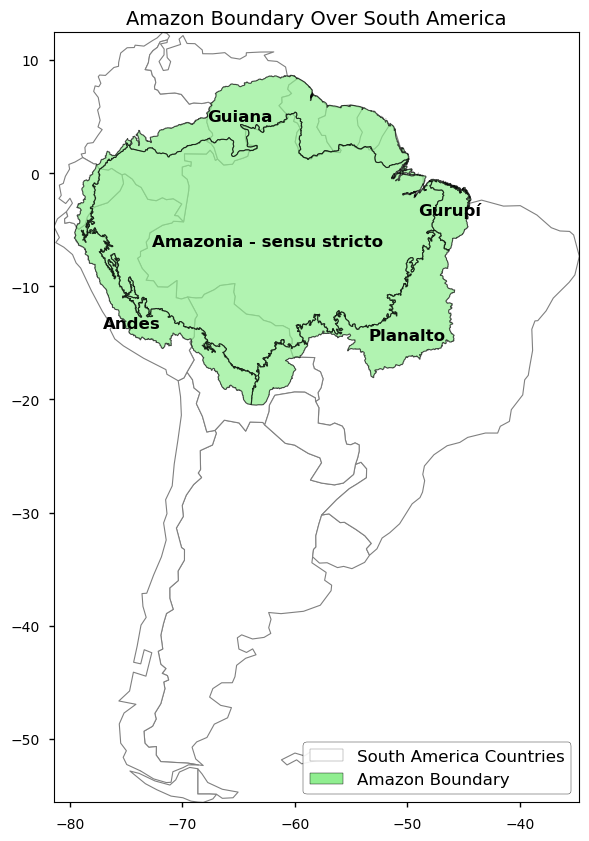

Figure 1.4.1.1 Amazon Boundary Over South America.

In [5]:
warnings.filterwarnings("ignore")

# ---------------------------------------------------------
# 1. Download & load Natural Earth countries
# ---------------------------------------------------------
ne_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
r = requests.get(ne_url)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("ne_110m_admin_0_countries")

countries_gdf = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
countries_gdf = countries_gdf.to_crs("EPSG:4326")

# ---------------------------------------------------------
# 2. Filter South America only
# ---------------------------------------------------------
sa = countries_gdf[countries_gdf["CONTINENT"] == "South America"]

# ---------------------------------------------------------
# 3. Load the Amazon shapefile
# ---------------------------------------------------------
amaz_url = "https://forobs.jrc.ec.europa.eu/static/amazon/amazonia_boundary_proposal_Eva_2005.zip"
amazon = gpd.read_file(amaz_url).to_crs("EPSG:4326")

# ---------------------------------------------------------
# 4. Plot South America + Amazon
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# South America countries
sa.plot(ax=ax, color="white", edgecolor="gray", linewidth=0.8)

# Amazon region
amazon.plot(ax=ax, color="lightgreen", edgecolor="black", linewidth=0.8, alpha=0.7)

# Label Amazon subregions
# Compute representative points (base label positions)
unique = amazon.drop_duplicates(subset="name")
unique["x"] = unique.geometry.representative_point().x
unique["y"] = unique.geometry.representative_point().y
# Manually adjust label positions (dx, dy) offsets
manual_offsets = {
    "Andes": (2.5, -5.0),                  # adjust here
    "Guiana": (0.0, 0.0),                 # adjust here
    "Planalto": (-1.0, -2.0),               # adjust here
    "Amazonia - senso strictu": (0.0, 0.0),  # adjust here
    "Gurupi": (0.0, 0.0),                 # adjust here
}


for _, row in unique.iterrows():
    name = row["name"]
    x = row["x"]
    y = row["y"]

    # apply your (dx, dy) offsets
    dx, dy = manual_offsets.get(name, (0, 0))

    ax.text(
        x + dx,
        y + dy,
        name,
        ha="center",
        fontsize=12,
        color="black",
        weight="bold"
    )

# ---------------------------------------------------------
# 4b. Legend
# ---------------------------------------------------------
legend_elements = [
    Patch(facecolor="white", edgecolor="gray", label="South America Countries"),
    Patch(facecolor="lightgreen", edgecolor="black", label="Amazon Boundary"),
]

ax.legend(
    handles=legend_elements,
    loc="lower right",
    fontsize=12,
    frameon=True,
    framealpha=0.9,
    edgecolor="black"
)

# ---------------------------------------------------------
# 5. Limit axis to South America extent
# ---------------------------------------------------------
minx, miny, maxx, maxy = sa.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ax.set_title("Amazon Boundary Over South America", fontsize=14)
plt.show()

display(Markdown("Figure 1.4.1.1 Amazon Boundary Over South America."))

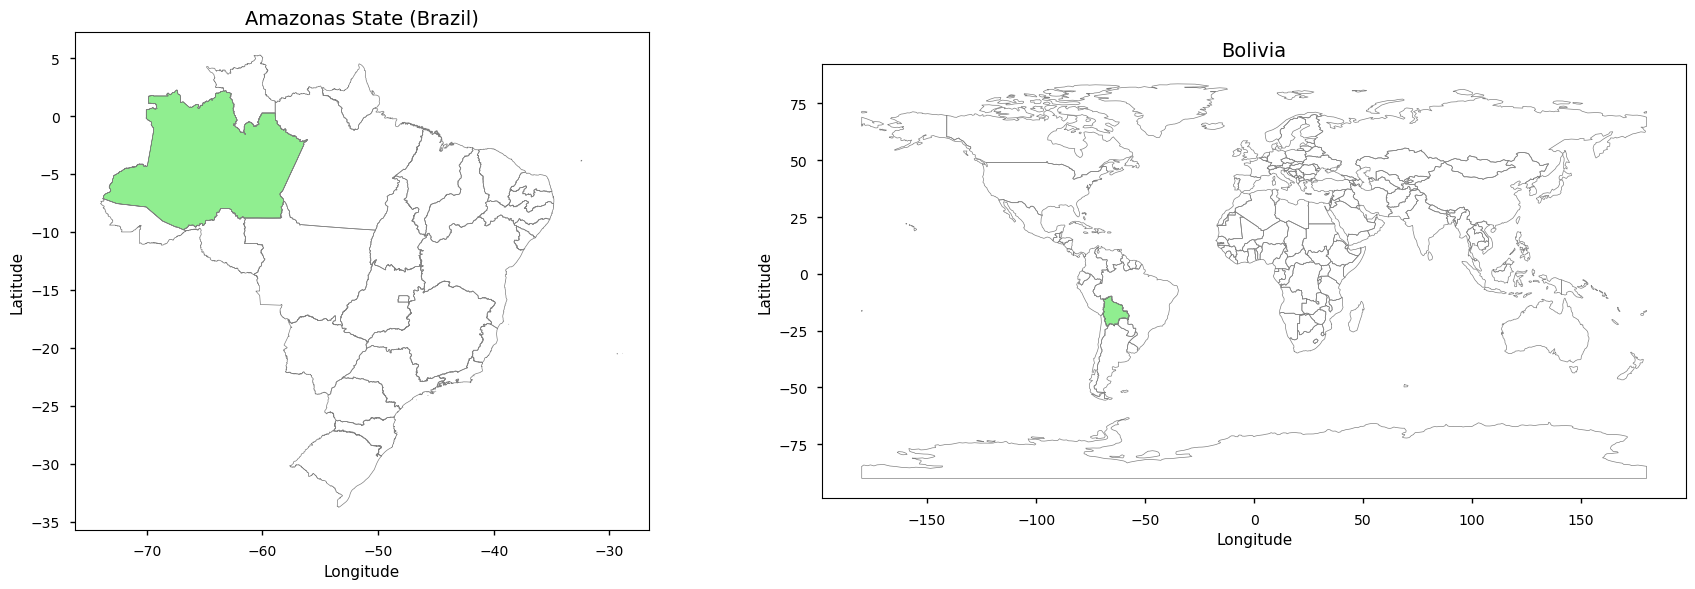

Figure 1.4.1.2 Amazonas State - Brazil (left panel) and Bolivia (right panel).

In [6]:
warnings.filterwarnings("ignore")

# ============================================================
# 1. Amazonas (Brazil) shapefile (IBGE)
# ============================================================

ibge_url = "https://data.humdata.org/dataset/f5f0648e-f085-4c85-8242-26bf6c942f40/resource/2f26be26-a081-4557-8572-58545cd70e9f/download/bra_adm_ibge_2020_shp.zip"

r = requests.get(ibge_url)
with open("bra_adm_ibge_2020.zip", "wb") as f:
    f.write(r.content)

states_gdf = gpd.read_file("zip://bra_adm_ibge_2020.zip!bra_admbnda_adm1_ibge_2020.shp")
states_gdf = states_gdf.set_crs("EPSG:4674").to_crs("EPSG:4326")
amazonas = states_gdf[states_gdf['ADM1_PT'].str.lower() == 'amazonas']

# ============================================================
# 2. Bolivia (Natural Earth)
# ============================================================

ne_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
r = requests.get(ne_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("ne_110m_admin_0_countries")

countries_gdf = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
bolivia = countries_gdf[countries_gdf['NAME'] == 'Bolivia']

# ============================================================
# 3. Plot regions
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Amazonas ---
states_gdf.boundary.plot(ax=axes[0], color="gray", linewidth=0.5)
amazonas.plot(ax=axes[0], color="lightgreen", edgecolor="black")
axes[0].set_title("Amazonas State (Brazil)", fontsize=14)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# --- Bolivia ---
countries_gdf.boundary.plot(ax=axes[1], color="gray", linewidth=0.5)
bolivia.plot(ax=axes[1], color="lightgreen", edgecolor="black")
axes[1].set_title("Bolivia", fontsize=14)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

plt.tight_layout()

plt.show()
display(Markdown("Figure 1.4.1.2 Amazonas State - Brazil (left panel) and Bolivia (right panel)."))

In [7]:
# Define request

request = (
    "satellite-fire-radiative-power",
    {
        "product_type": "gridded",
        "time_aggregation": "month",
        "horizontal_aggregation": "0_25_degree_x_0_25_degree",
        "satellite": ["sentinel_3a", "sentinel_3b"],
        "observation_time": ["day", "night"],
        "year": ["2020", "2021","2022", "2023","2024", "2025"],
        "month": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"],
        "day": ["01"],
        "version": "1_2",
        },
)

In [8]:
# Download and regionalize
lon_slice = slice(minx, maxx) 
lat_slice = slice(maxy, miny)

ds = download.download_and_transform(
    *request,
    transform_func=utils.regionalise,
    transform_func_kwargs={"lon_slice": lon_slice, "lat_slice": lat_slice},
    chunks={"year": 1},
)

100%|██████████| 6/6 [00:00<00:00, 16.35it/s]


(satellite_satellite-fire-radiative-power_completeness_q03:code-section-3)=
### 3. Spatial analysis, averaged maps of FRP and AF for each season.

In [9]:
# --- define frp and active fire_pixels ---
frp = ds['frp']
af = ds['fire_pixels']

# --- Add year and season coordinates ---
frp.coords["year"] = frp["time"].dt.year
frp.coords["season"] = frp["time"].dt.season
af.coords["year"] = af["time"].dt.year
af.coords["season"] = af["time"].dt.season

# --- Group by year + season ---
frp_season_year = frp.groupby(["year", "season"]).mean("time")
af_season_year  = af.groupby(["year", "season"]).sum("time")

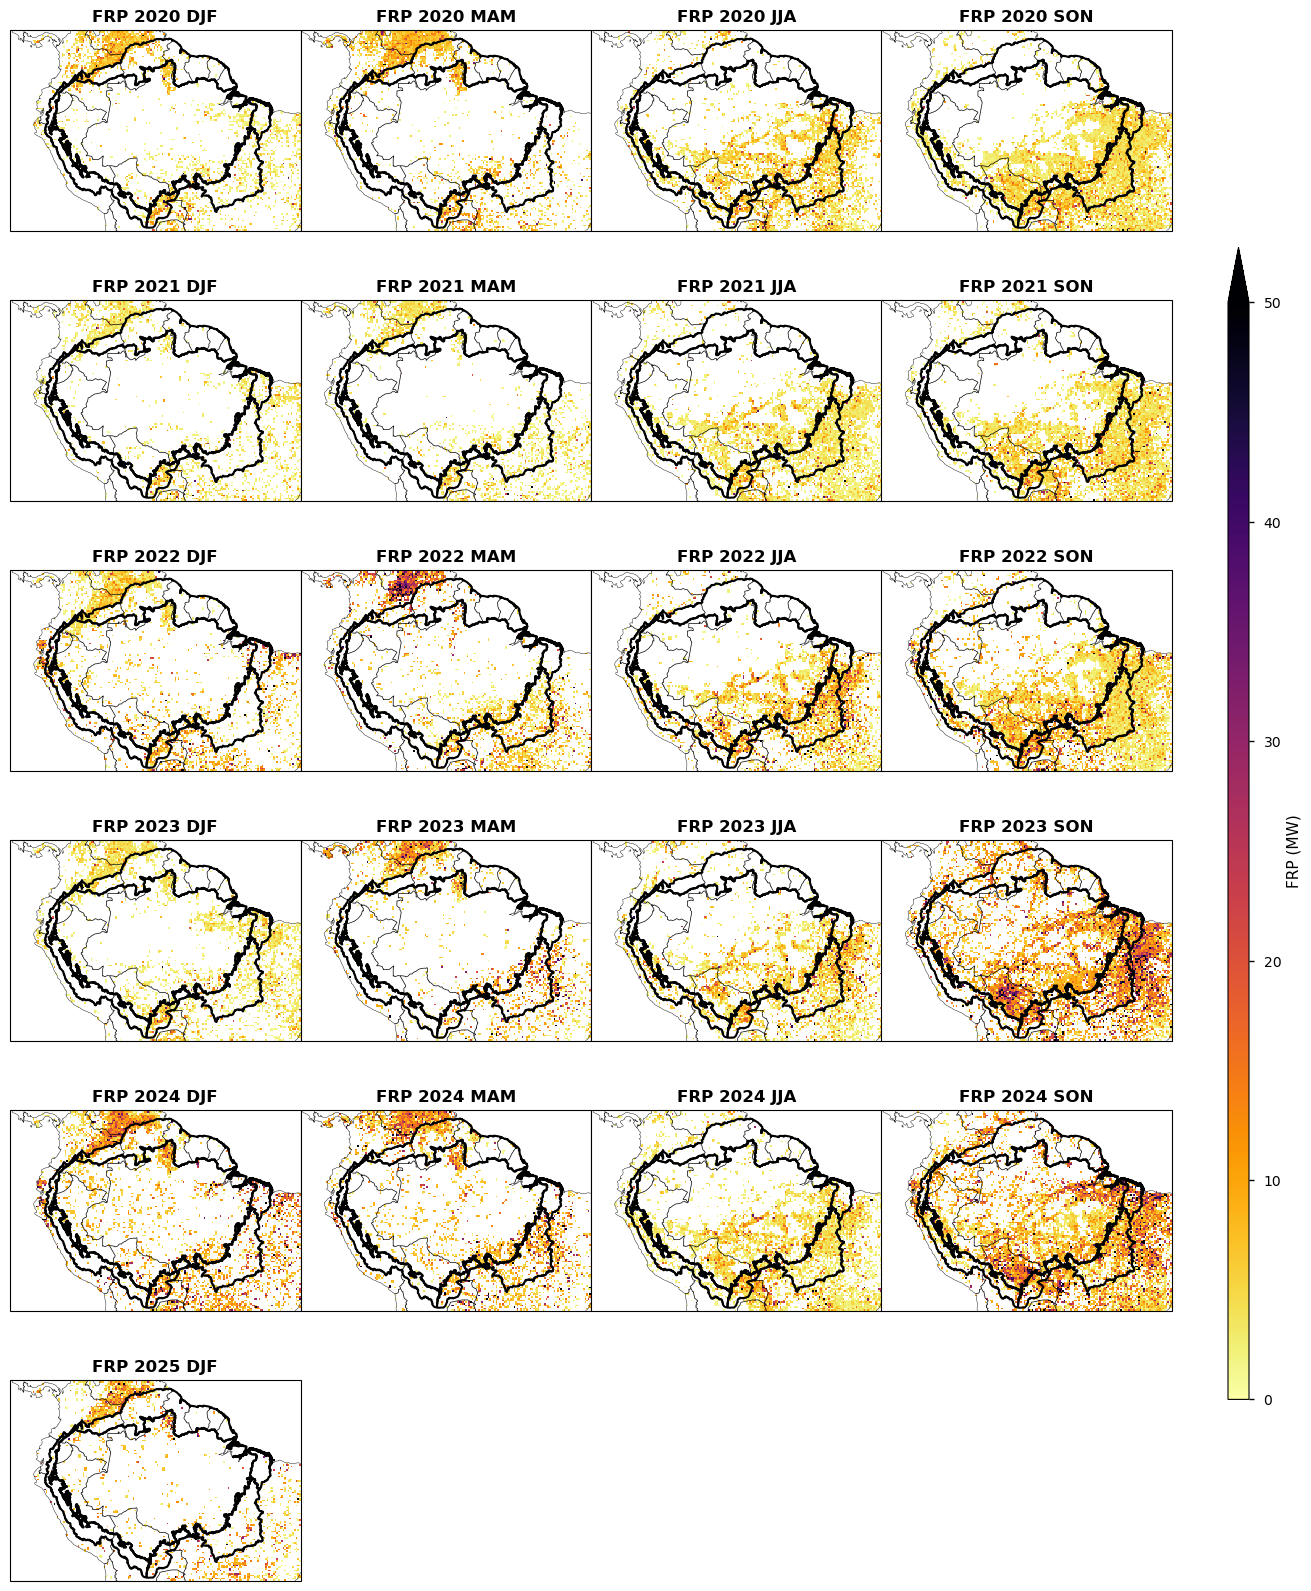

**Figure 1.4.1.3.** Seasonal Fire Radiative Power (FRP) over the Amazon Basin (2020–2025).

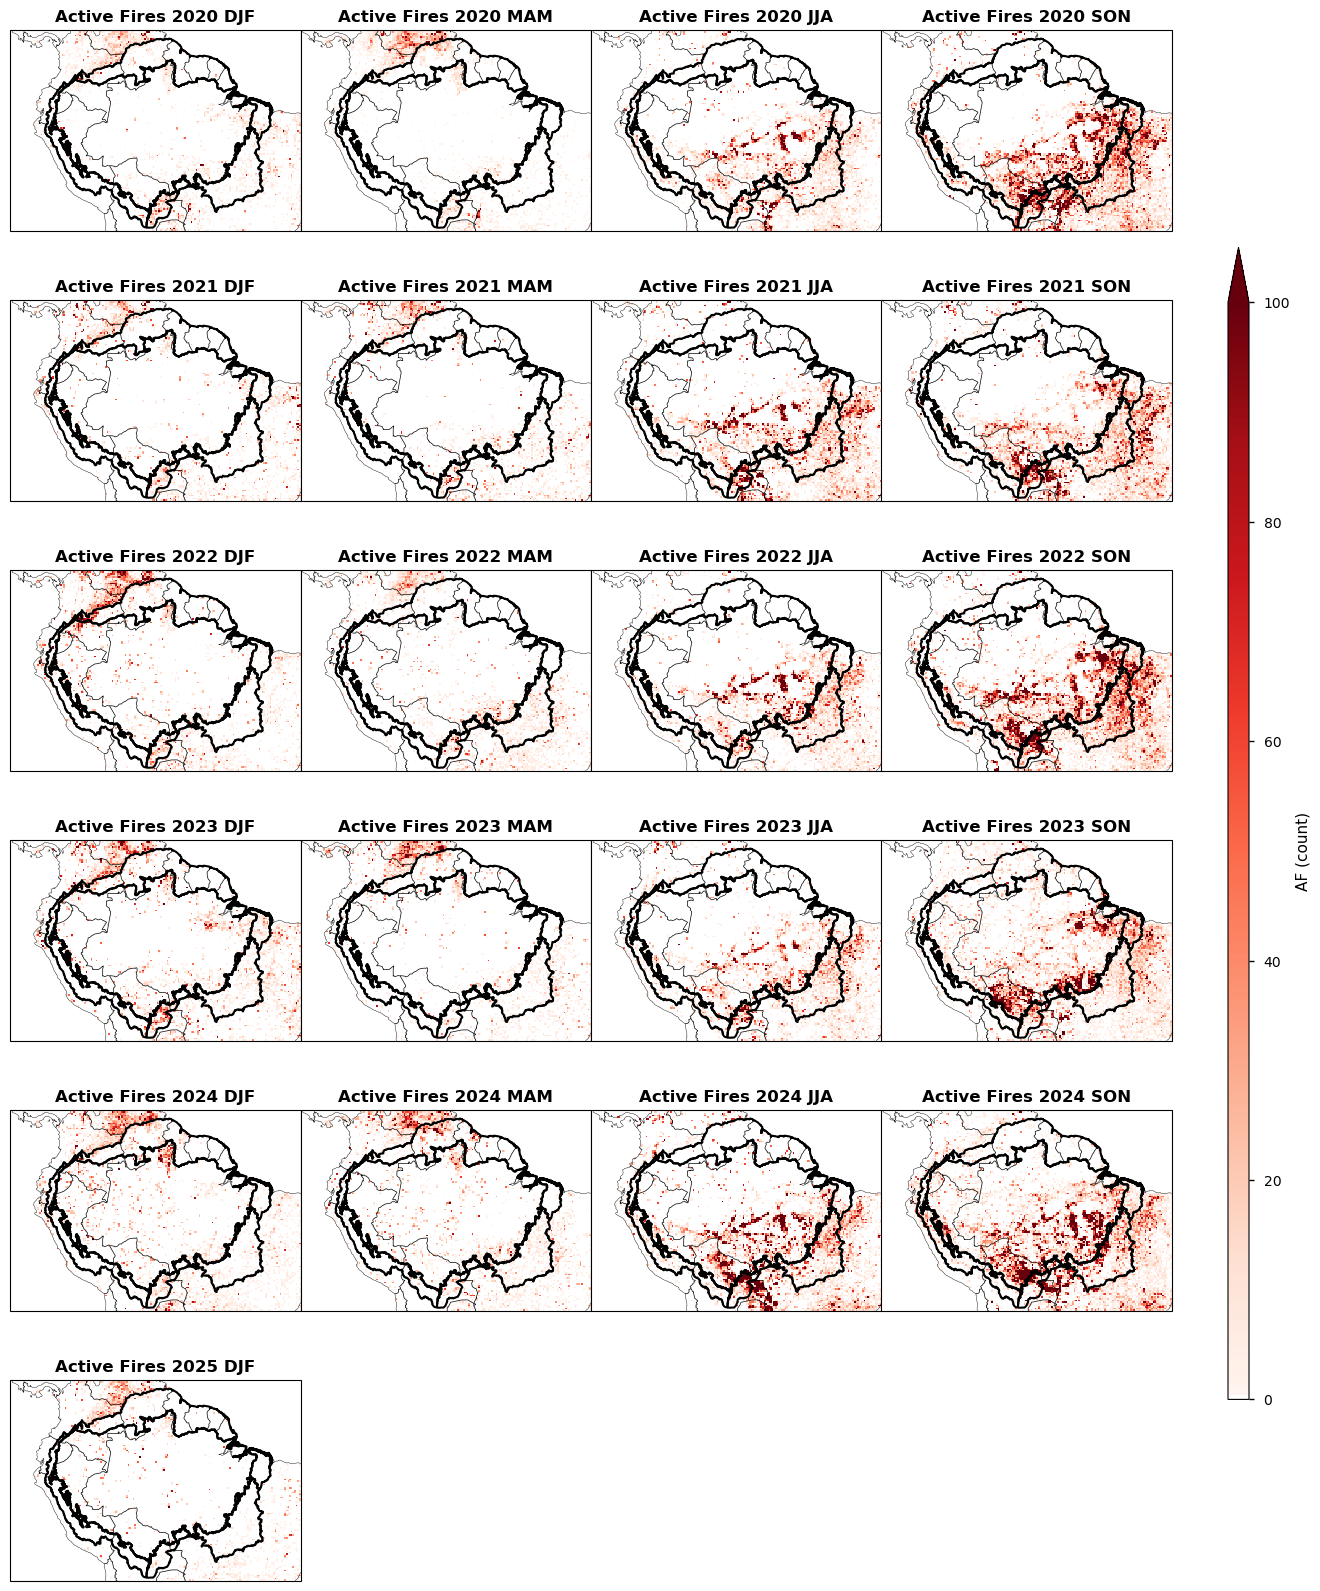

**Figure 1.4.1.4.** Seasonal Active Fires (AF) over the Amazon Basin (2020–2025).

In [10]:
warnings.filterwarnings("ignore")

# --- Seasons and years ---
seasons = ["DJF", "MAM", "JJA", "SON"]
years   = [2020, 2021, 2022, 2023, 2024, 2025]

# --- Geographic extent ---
extent = [-85, -40, -21, 10]   # [lon_min, lon_max, lat_min, lat_max]

# ============================================================
# CUSTOM COLORMAP FOR AF: zero → white
# ============================================================
reds = cm.get_cmap("Reds", 256)
reds_colors = reds(np.linspace(0, 1, 256))
reds_colors[0] = np.array([1, 1, 1, 1])  # zero = pure white
Reds_white0 = mcolors.ListedColormap(reds_colors)

# ============================================================
# FUNCTION TO PLOT A VARIABLE
# ============================================================
def plot_variable(var_season_year, cmap, label, title_prefix, vmin=None, vmax=None):

    valid_combinations = [(y, s) for y in years for s in seasons
                          if not (y == 2025 and s in ["MAM", "JJA", "SON"])]

    nrows = len(set([y for y, s in valid_combinations]))
    ncols = len(seasons)

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(14, 18),
        subplot_kw={"projection": ccrs.PlateCarree()},
        gridspec_kw={'wspace': 0, 'hspace': 0}
    )

    # --- Plot seasonal maps ---
    for row, year in enumerate(years):
        for col, s in enumerate(seasons):

            ax = axes[row, col]

            # Remove invalid 2025 seasons
            if year == 2025 and s in ["MAM", "JJA", "SON"]:
                ax.remove()
                continue

            da = var_season_year.sel(year=year, season=s)

            im = da.plot(
                ax=ax,
                transform=ccrs.PlateCarree(),
                cmap=cmap,
                add_colorbar=False,
                vmin=vmin,
                vmax=vmax
            )

            # --- Set geographic domain ---
            ax.set_extent(extent, crs=ccrs.PlateCarree())

            # --- Overlay boundaries ---
            amazon.boundary.plot(ax=ax, color="black", linewidth=1.5)
            ax.add_feature(cfeature.BORDERS, linewidth=0.5)
            ax.coastlines()

            ax.set_title(f"{title_prefix} {year} {s}", fontsize=12, weight="bold")

    # Shared colorbar
    cbar_ax = fig.add_axes([0.92, 0.18, 0.015, 0.64])
    fig.colorbar(im, cax=cbar_ax, label=label, extend="max")

    # Proper spacing for Cartopy subplots
    fig.subplots_adjust(
        left=0.05, right=0.88, top=0.96, bottom=0.06,
        hspace=0.25, wspace=0.05
    )

    plt.show()

# ============================================================
# PLOT FRP
# ============================================================
plot_variable(
    frp_season_year,
    cmap="inferno_r",
    label="FRP (MW)",
    title_prefix="FRP",
    vmin=0,
    vmax=50
)

display(Markdown("**Figure 1.4.1.3.** Seasonal Fire Radiative Power (FRP) over the Amazon Basin (2020–2025)."))

# ============================================================
# PLOT AF (with zero = white colormap)
# ============================================================
plot_variable(
    af_season_year,
    cmap=Reds_white0,        # ← custom colormap here
    label="AF (count)",
    title_prefix="Active Fires",
    vmin=0,
    vmax=100
)

display(Markdown("**Figure 1.4.1.4.** Seasonal Active Fires (AF) over the Amazon Basin (2020–2025)."))

* satellite-fire-radiative-powerThe spatial patterns highlight the comparison between Fire Radiative Power (FRP) and Active Fires during 2020–2025 (i.e. Jan-2020 until Feb-2025), across the seasonal periods of December–January–February (DJF), March–April–May (MAM), June–July–August (JJA), and September–October–November (SON). The most severely impacted region was the southeastern portion of Amazonia sensu stricto, where fire activity was notably higher than in the Planalto region, which encompasses the Brazilian Cerrado savanna.

A first comparison assesment was made, by comparing a computed standardized anomaly from C3S AF product (considering the period between 2020-2024) against the results described in [[3]](https://doi.org/10.3390/rs16142519), which does account for the period between 2002-2024. Also a third seasonal average figure from the 2022 and 2023 years (as like Figure 1) is also shown here.

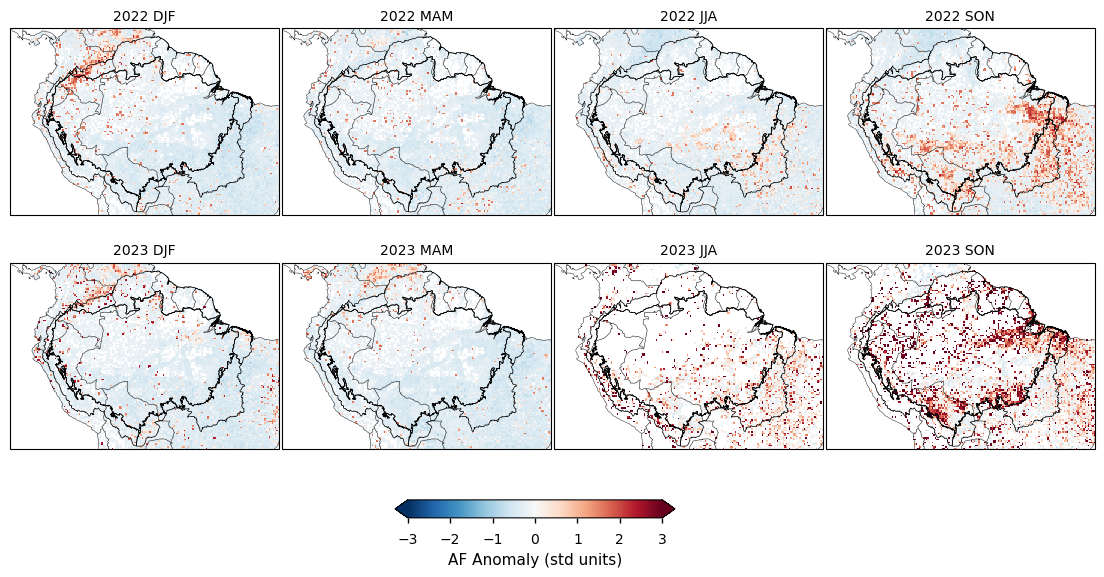

**Figure 1.4.1.5.** Seasonal Active Fires (AF) Anomalies over the Amazon Basin (2022–2023).

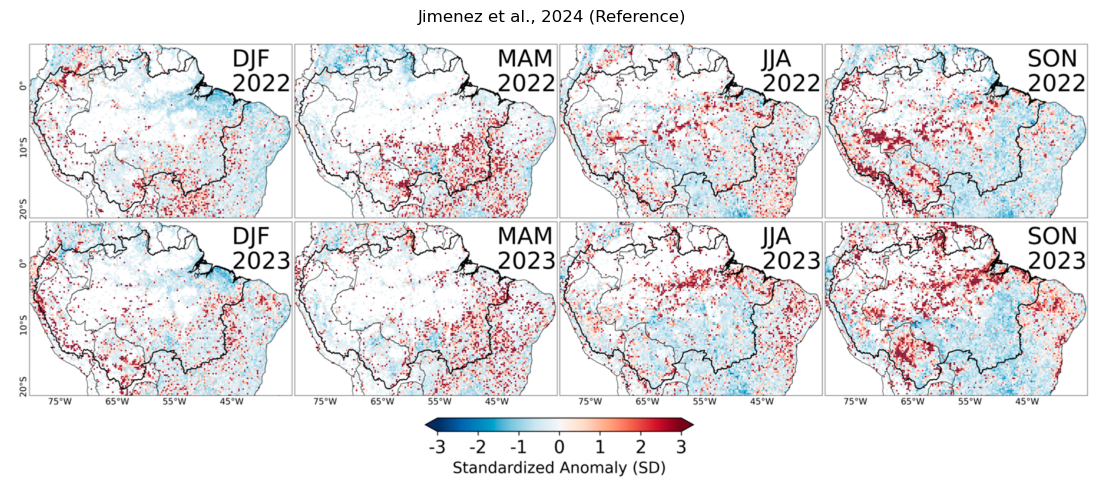

**Figure 1.4.1.6.** Seasonal Active Fires (AF) Anomalies over the Amazon Basin (2022–2023) from Jimenez et al., 2024.

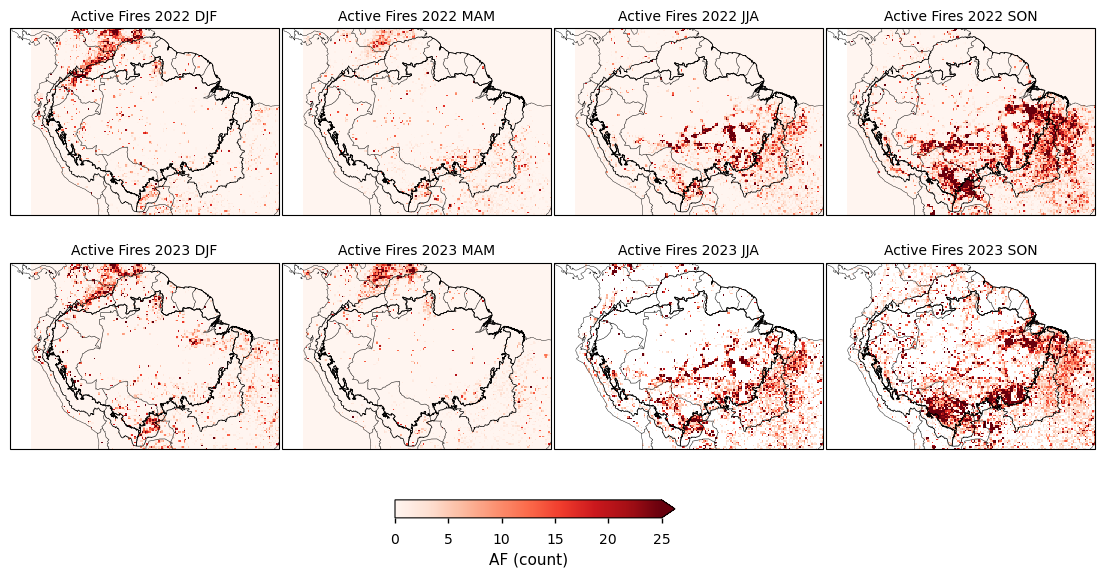

**Figure 1.4.1.7.** Seasonal Active Fires (AF) Anomalies over the Amazon Basin, like in Figure 1.4.1.4, but only for 2022 and 2023.

In [11]:
# --- Parameters ---
seasons = ["DJF", "MAM", "JJA", "SON"]
years_to_plot = [2022, 2023]
vmin, vmax = -3, 3
cmap = "RdBu_r"

# --- Geographic extent ---
extent = [-85, -40, -21, 10]   # [lon_min, lon_max, lat_min, lat_max]

# --- Compute anomalies safely ---
af_mean = af.mean(dim="time", skipna=True)
af_std  = af.std(dim="time", skipna=True)
with np.errstate(divide='ignore', invalid='ignore'):
    af_anom = (af - af_mean) / af_std
af_anom = af_anom.where(np.isfinite(af_anom))
af_anom.coords["year"] = af_anom["time"].dt.year
af_anom.coords["season"] = af_anom["time"].dt.season
af_anom_season_year = af_anom.groupby(["year", "season"]).mean("time")
af_anom_season_year = af_anom_season_year.sel(year=years_to_plot)

# --- Compute raw seasonal means (for the new figure) ---
af.coords["year"] = af["time"].dt.year
af.coords["season"] = af["time"].dt.season
af_season_year = af.groupby(["year", "season"]).mean("time")
af_season_year = af_season_year.sel(year=years_to_plot)

# =======================================================
# FIGURE 1: C3S Anomalies product
# =======================================================
nrows = len(years_to_plot)
ncols = len(seasons)

fig, axes = plt.subplots(
    nrows=nrows, ncols=ncols,
    figsize=(14, 6),
    subplot_kw={"projection": ccrs.PlateCarree()},
    constrained_layout=False
)

plt.subplots_adjust(wspace=0.01, hspace=0.15, bottom=0.15)

for row, year in enumerate(years_to_plot):
    for col, s in enumerate(seasons):
        ax = axes[row, col]
        da = af_anom_season_year.sel(year=year, season=s)
        im = da.plot(ax=ax, transform=ccrs.PlateCarree(),
                     cmap=cmap, add_colorbar=False,
                     vmin=vmin, vmax=vmax)
        # --- Set geographic domain ---
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        amazon.boundary.plot(ax=ax, color="black", linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linewidth=0.35)
        ax.coastlines()
        ax.set_title(f"{year} {s}", fontsize=10)

# Shared colorbar
cbar_ax = fig.add_axes([0.4, 0.05, 0.2, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal',
             label='AF Anomaly (std units)', extend='both')

plt.show()
display(Markdown("**Figure 1.4.1.5.** Seasonal Active Fires (AF) Anomalies over the Amazon Basin (2022–2023)."))

# =======================================================
# FIGURE 2: Reference image from Jimenez et al., 2024
# =======================================================
img = mpimg.imread("/home/vitormiranda/c3s-eqc-automatic-quality-control/notebooks/remotesensing-16-02519-g009.png")
fig2, ax2 = plt.subplots(figsize=(14, 6))
ax2.imshow(img)
ax2.axis("off")
ax2.set_title("Jimenez et al., 2024 (Reference)", fontsize=12, pad=10)

plt.show()
display(Markdown("**Figure 1.4.1.6.** Seasonal Active Fires (AF) Anomalies over the Amazon Basin (2022–2023) from Jimenez et al., 2024."))

# =======================================================
# FIGURE 3: Raw AF seasonal means
# =======================================================
fig3, axes3 = plt.subplots(
    nrows=nrows, ncols=ncols,
    figsize=(14, 6),
    subplot_kw={"projection": ccrs.PlateCarree()},
    constrained_layout=False
)

plt.subplots_adjust(wspace=0.01, hspace=0.15, bottom=0.15)

for row, year in enumerate(years_to_plot):
    for col, s in enumerate(seasons):
        ax = axes3[row, col]
        da = af_season_year.sel(year=year, season=s)
        im3 = da.plot(ax=ax, transform=ccrs.PlateCarree(),
                      cmap="Reds", add_colorbar=False,
                      vmin=0, vmax=25)
        # --- Set geographic domain ---
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        amazon.boundary.plot(ax=ax, color="black", linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linewidth=0.35)
        ax.coastlines()
        ax.set_title(f"Active Fires {year} {s}", fontsize=10)

# Shared colorbar for raw means
cbar_ax3 = fig3.add_axes([0.4, 0.05, 0.2, 0.03])
fig3.colorbar(im3, cax=cbar_ax3, orientation='horizontal',
              label='AF (count)', extend='max')

plt.show()
display(Markdown("**Figure 1.4.1.7.** Seasonal Active Fires (AF) Anomalies over the Amazon Basin, like in Figure 1.4.1.4, but only for 2022 and 2023."))

The two products do not allow a direct comparison of the standardized anomalies, because of the mismatch in time periods (i.e., their study covers 2002–2024, while C3S AF only spans through 2020–2024).

* The region encompassing "Gurupi" and "Planalto" sub-regions represents parts of the Cerrado savanna, an ecosystem naturally characterized by recurrent fire dynamics. The differences observed likely address for the shorter temporal coverage of CDS dataset (5 years) compared to theirs (22 years, i.e. MODIS AF); in a region with frequent fire events, Although both datasets express standardized anomalies, the shorter 5-year record may yield smoother signals due to the event being included within its normalization period, which inflates the local standard deviation.

* Nevertheless, some consistent signals were observable, such as: 
The Colombian AF anomaly during DJF of 2022; 
The Bolivian AF count during SON of 2022;
A AF count near the Southeastern transition region between Amazonia sensu-stricto and Planalto for 2022;
Some spots in JJA of 2023 anomaly inside the amazon-sensu stricto;
A pronounced AF anomaly and AF count in SON 2023 over Amazonia-sensu stricto; 
A pronounced AF anomaly and AF count in SON 2023 over Bolivia domain.

(satellite_satellite-fire-radiative-power_completeness_q03:code-section-4)=
### 4. Temporal analysis of FRP and AF.

In order to assess the temporal quality of the dataset, we selected three specific areas:

1) Amazonas state (Brazil), as referenced in both: [[1]](https://essd.copernicus.org/articles/16/3601/2024/essd-16-3601-2024-discussion.html) and [[2]](https://essd.copernicus.org/preprints/essd-2025-483/).

2) Bolivia, also following: [[2]](https://essd.copernicus.org/preprints/essd-2025-483/).

And then computed the  annual fire count from Active Fire's and the average fire’s peak fire intensity (95th percentile value of fire radiative power within fire
perimeters), as described in [[2]](https://essd.copernicus.org/preprints/essd-2025-483/).

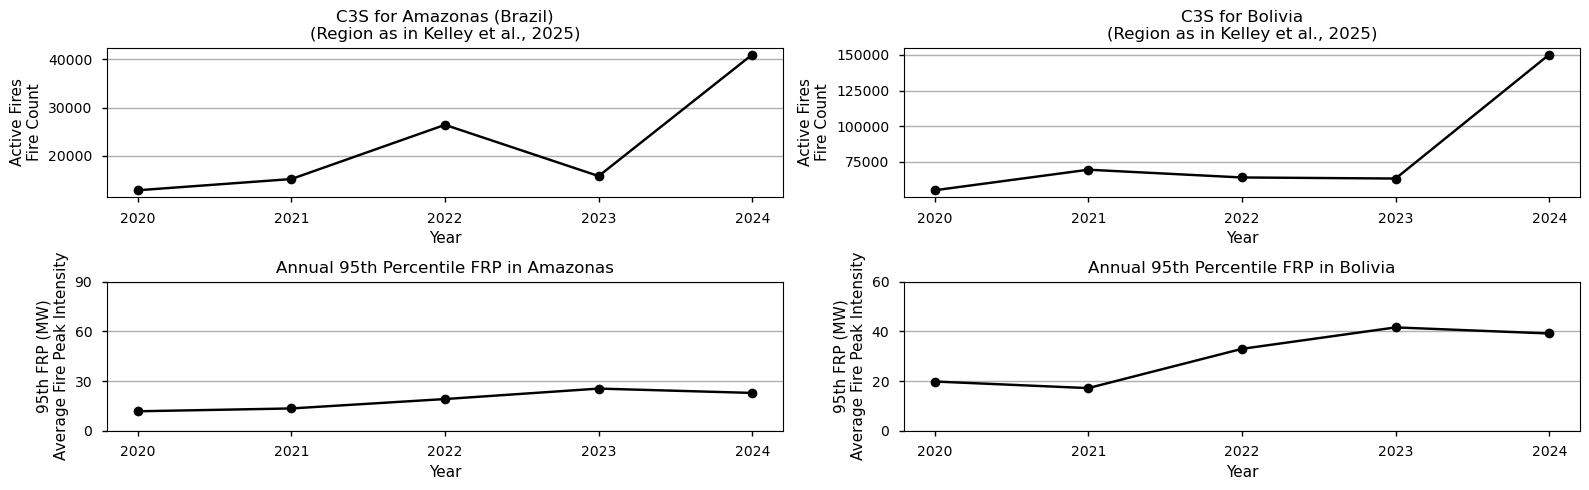

**Figure 1.4.1.8.** Annual Active Fires (AF) and 95th Percentile Fire Radiative Power (FRP) for Amazonas and Bolivia from 2019 to 2024.

In [12]:
# Ignore warnings
warnings.filterwarnings("ignore")

# ============================
# --- Amazonas (Brazil) ---
# ============================
mask_amazonas = regionmask.Regions([amazonas.geometry.values[0]])
frp_amazonas = frp.where(mask_amazonas.mask(frp.longitude, frp.latitude) == 0)
af_amazonas = af.where(mask_amazonas.mask(af.longitude, af.latitude) == 0)

annual_frp_amazonas_percentile = []
years = np.unique(frp_amazonas['time.year'].values)[:5]
for yr in years:
    arr = frp_amazonas.where(frp_amazonas['time.year'] == yr)
    arr_flat = arr.values.flatten()
    arr_flat = arr_flat[~np.isnan(arr_flat)]
    value_95 = np.percentile(arr_flat, 95)
    annual_frp_amazonas_percentile.append({'year': yr, 'peak_frp': value_95})
annual_frp_amazonas_df = pd.DataFrame(annual_frp_amazonas_percentile)

# Monthly AF time series (sum only over space)
monthly_af_amazonas = af_amazonas.sum(dim=('latitude', 'longitude'))
monthly_af_amazonas = monthly_af_amazonas.sel(time=monthly_af_amazonas.time.dt.year <= 2024)

# Convert to annual if needed for plotting
annual_af_amazonas_df = (monthly_af_amazonas.groupby('time.year')
    .sum()
    .to_dataframe(name='annual_af')
    .reset_index()
)
   
# ============================
# --- Bolivia ---
# ============================
mask_bolivia = regionmask.Regions([bolivia.geometry.values[0]])
frp_bolivia = frp.where(mask_bolivia.mask(frp.longitude, frp.latitude) == 0)
af_bolivia = af.where(mask_bolivia.mask(af.longitude, af.latitude) == 0)

annual_frp_bolivia_percentile = []
years_bolivia = np.unique(frp_bolivia['time.year'].values)[:5]
for yr in years_bolivia:
    arr = frp_bolivia.where(frp_bolivia['time.year'] == yr)
    arr_flat = arr.values.flatten()
    arr_flat = arr_flat[~np.isnan(arr_flat)]
    value_95 = np.percentile(arr_flat, 95)
    annual_frp_bolivia_percentile.append({'year': yr, 'peak_frp': value_95})
annual_frp_bolivia_df = pd.DataFrame(annual_frp_bolivia_percentile)
# Monthly AF time series (sum only over space)
monthly_af_bolivia = af_bolivia.sum(dim=('latitude', 'longitude')) 
monthly_af_bolivia = monthly_af_bolivia.sel(time=monthly_af_bolivia.time.dt.year <= 2024)
# Convert to annual if needed for plotting
annual_af_bolivia_df = (monthly_af_bolivia.groupby('time.year')
    .sum()
    .to_dataframe(name='annual_af')
    .reset_index()
)   

# ============================
# --- Plotting ---
# ============================
fig, axes = plt.subplots(2, 2, figsize=(16, 5), sharey=False)

# AF for Amazonas (top left)
axes[0, 0].plot(annual_af_amazonas_df['year'], annual_af_amazonas_df['annual_af'], 'o-k', markersize=7)
axes[0, 0].grid(axis='y')
axes[0, 0].set_xticks(annual_af_amazonas_df['year'])
axes[0, 0].set_xticklabels(annual_af_amazonas_df['year'].astype(int))
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_title("C3S for Amazonas (Brazil)\n(Region as in Kelley et al., 2025)", fontsize=12)
axes[0, 0].set_ylabel('Active Fires\nFire Count')

# AF for Bolivia (top right)
axes[0, 1].plot(annual_af_bolivia_df['year'], annual_af_bolivia_df['annual_af'], 'o-k', markersize=7)
axes[0, 1].grid(axis='y')
axes[0, 1].set_xticks(annual_af_bolivia_df['year'])
axes[0, 1].set_xticklabels(annual_af_bolivia_df['year'].astype(int))
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_title('C3S for Bolivia\n(Region as in Kelley et al., 2025)', fontsize=12)
axes[0, 1].set_ylabel('Active Fires\nFire Count')

# 95th percentile FRP for Amazonas (bottom left)
axes[1, 0].plot(annual_frp_amazonas_df['year'], annual_frp_amazonas_df['peak_frp'], 'o-k', markersize=7)
axes[1, 0].grid(axis='y')
axes[1, 0].set_xticks(annual_frp_amazonas_df['year'])
axes[1, 0].set_xticklabels(annual_frp_amazonas_df['year'].astype(int))
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_title("Annual 95th Percentile FRP in Amazonas", fontsize=12)
axes[1, 0].set_ylim(0, 90)
axes[1, 0].set_yticks([0, 30, 60, 90])
axes[1, 0].set_ylabel('95th FRP (MW)\nAverage Fire Peak Intensity')

# 95th percentile FRP for Bolivia (bottom right)
axes[1, 1].plot(annual_frp_bolivia_df['year'], annual_frp_bolivia_df['peak_frp'], 'o-k', markersize=7)
axes[1, 1].grid(axis='y')
axes[1, 1].set_xticks(annual_frp_bolivia_df['year'])
axes[1, 1].set_xticklabels(annual_frp_bolivia_df['year'].astype(int))
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_title('Annual 95th Percentile FRP in Bolivia', fontsize=12)
axes[1, 1].set_ylim(0, 60)
axes[1, 1].set_yticks([0, 20, 40, 60])
axes[1, 1].set_ylabel('95th FRP (MW)\nAverage Fire Peak Intensity')

plt.tight_layout()
plt.show()
display(Markdown("**Figure 1.4.1.8.** Annual Active Fires (AF) and 95th Percentile Fire Radiative Power (FRP) for Amazonas and Bolivia from 2019 to 2024."))

Figure below it is a snapshot D.I. Kelley et al. (2024), check for Figures A4 and A5 in [[2]](https://essd.copernicus.org/preprints/essd-2025-483/).

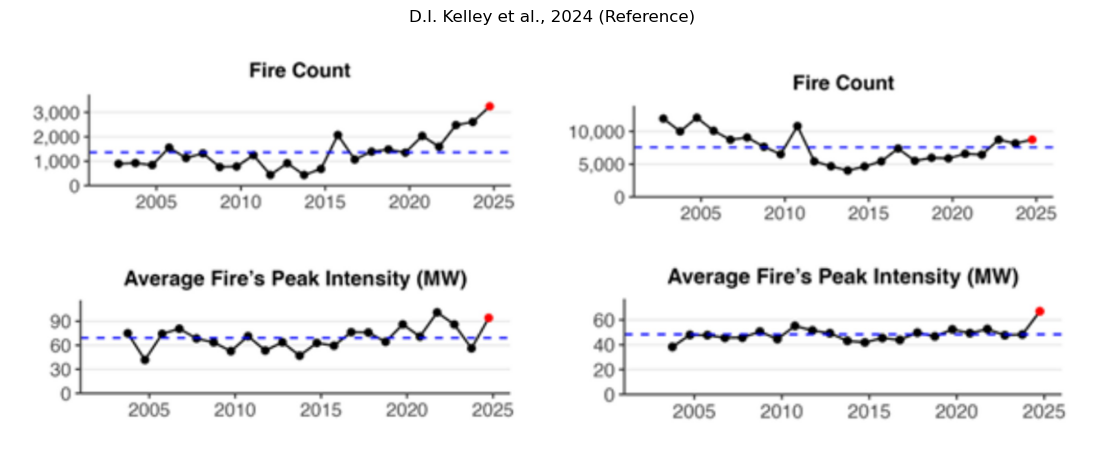

**Figure 1.4.1.9.** Snapshot from D.I. Kelley et al., 2024.

In [15]:
# =======================================================
# FIGURE: Reference image from D.I. Kelley et al., 2024
# =======================================================
img = mpimg.imread("/home/vitormiranda/c3s-eqc-automatic-quality-control/notebooks/D-I-Kelley-et-al.jpg")
fig2, ax2 = plt.subplots(figsize=(14, 6))
ax2.imshow(img)
ax2.axis("off")
ax2.set_title("D.I. Kelley et al., 2024 (Reference)", fontsize=12, pad=10)
plt.show()
display(Markdown("**Figure 1.4.1.9.** Snapshot from D.I. Kelley et al., 2024."))

The C3S dataset reports higher magnitudes of active fires compared to the State of Wildfires reference dataset, which was expected given C3S's finer spatial resolution and sensitivity to smaller, short-duration fire events that coarser datasets may omit. However, fire count magnitudes between C3S and the reference are consistent, showing high correlations and comparable temporal patterns in regions like Amazonas and Bolivia. For Fire Radiative Power (FRP), the State of Wildfires reports higher values especially over Amazonia, reflecting its emphasis on larger, intense fires; in Bolivia, FRP values from both datasets are closer in magnitude. While FRP correlations are lower than for fire counts and active fires, both datasets clearly capture the major fire activity peak in 2022.

(satellite_satellite-fire-radiative-power_completeness_q03:code-section-5)=
### 5. Daily temporal peak of AF.

In this analysis, we use daily Active Fire (AF) observations from the Copernicus Climate Data Store (C3S) for the period July 2023 to December 2024.
The assessment focuses on the Western Amazonia region, defined by the bounding coordinates 2.25° N, −56.00° E and −9.75° S, −77.75° W.
This area encompasses parts of Amazonas (Brazil), Loreto (Peru), and La Paz and Beni (Bolivia), which collectively experienced exceptional fire activity during 2023–2024, as documented by: [[1]](https://essd.copernicus.org/articles/16/3601/2024/essd-16-3601-2024-discussion.html).

In [16]:
# Define new request for daily data

request = (
    "satellite-fire-radiative-power",
    {
        "product_type": "gridded",
        "time_aggregation": "day",
        "horizontal_aggregation": "0_1_degree_x_0_1_degree",
        "satellite": ["sentinel_3a", "sentinel_3b"],
        "observation_time": ["night", "day"],
        "year": ["2023"],
        "month": ["06", "07", "08", "09", "10", "11", "12"],
        "day": ["01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"],
        "version": "1_2",
        },
)

In [17]:
# Download and regionalize
ds = download.download_and_transform(
    *request,
    transform_func=utils.regionalise,
    transform_func_kwargs={"lon_slice": lon_slice, "lat_slice": lat_slice},
    chunks={"satellite": 1, "month": 1},
)

100%|██████████| 14/14 [00:00<00:00, 33.76it/s]


In [18]:
print(ds)

<xarray.Dataset> Size: 3GB
Dimensions:                            (time: 214, latitude: 680,
                                        longitude: 467, bounds: 2)
Coordinates:
    lon_bounds                         (longitude, bounds) float32 4kB dask.array<chunksize=(467, 2), meta=np.ndarray>
    lat_bounds                         (latitude, bounds) float32 5kB dask.array<chunksize=(680, 2), meta=np.ndarray>
    time_bounds                        (time, bounds) datetime64[ns] 3kB dask.array<chunksize=(30, 2), meta=np.ndarray>
  * longitude                          (longitude) float32 2kB -81.35 ... -34.75
  * latitude                           (latitude) float32 3kB 12.35 ... -55.55
  * time                               (time) datetime64[ns] 2kB 2023-06-01 ....
Dimensions without coordinates: bounds
Data variables:
    fire_pixels                        (time, latitude, longitude) float64 544MB dask.array<chunksize=(15, 340, 234), meta=np.ndarray>
    frp                                

In [20]:
# --- define active fire_pixels ---
af_daily = ds['fire_pixels']

# Select the region slice (already done)
af_daily_region = af_daily.sel(
    latitude=slice(2.25, -9.75),
    longitude=slice(-77.75, -56.00)
)

# Sum over latitude and longitude for daily fire pixel counts
daily_fire_count = af_daily_region.sum(dim=['latitude', 'longitude'])

# Convert to pandas Series for easier sorting
daily_fire_vals = daily_fire_count.compute().to_series()

# Get the top 5 peaks with their counts
top5_peaks = daily_fire_vals.nlargest(5)

# Print the results
print("Top 5 fire peak days in Western Amazonia:")
for rank, (date, count) in enumerate(top5_peaks.items(), start=1):
    print(f"{rank} - Date: {date} - Peak fire pixels: {count}")

Top 5 fire peak days in Western Amazonia:
1 - Date: 2023-10-09 00:00:00 - Peak fire pixels: 1742.0
2 - Date: 2023-09-05 00:00:00 - Peak fire pixels: 1220.0
3 - Date: 2023-08-24 00:00:00 - Peak fire pixels: 1038.0
4 - Date: 2023-09-27 00:00:00 - Peak fire pixels: 869.0
5 - Date: 2023-09-25 00:00:00 - Peak fire pixels: 736.0


The daily C3S data showed significantly higher values of active fire (AF) peaks in Western Amazonia compared to Jones, Matthew W., et al. State of Wildfires 2023–2024. The referenced value of 824 (See Fig.7 in [[1]](https://essd.copernicus.org/articles/16/3601/2024/essd-16-3601-2024-discussion.html)) fire pixels within the first 10 days of the same month, indicating that the C3S data exhibits higher peak intensities of active fires in this region. This difference may reflect improved detection sensitivity or increased fire activity since the reference period.

(satellite_satellite-fire-radiative-power_completeness_q03:code-section-6)=
### 6. Main Takeaways

* The spatial patterns from 2020 to 2025 show Fire Radiative Power (FRP) and Active Fires with the highest fire activity in the southeastern Amazonia sensu stricto 

* Direct standardized anomaly comparison is limited due to differing time coverages: referenced study (2002–2024) vs. C3S AF dataset (2020–2024).

* The Cerrado region, exemplified by Gurupi and Planalto, naturally features frequent fires; C3S’s shorter 5-year record yields smoother standardized anomaly signals than the 22-year MODIS AF dataset.

* Consistent signals across years and seasons include:

    1) Colombian active fire anomaly in DJF 2022,

    2) Bolivian active fire count in SON 2022,

    3) Active fire counts near southeastern transitions between Amazonia sensu stricto and Planalto in 2022,

    4) AF anomalies in JJA 2023 within Amazonia sensu stricto,

    5) Pronounced AF anomalies and counts in SON 2023 over Amazonia sensu stricto and Bolivia domain.

* The C3S dataset records higher magnitudes of active fires than the State of Wildfires reference, likely due to finer spatial resolution and better sensitivity to smaller or shorter fires; fire counts are highly correlated between datasets with consistent temporal patterns.

* The State of Wildfires reports higher FRP values over Amazonia due to emphasis on larger, intense fires, with closer FRP values in Bolivia between datasets; both capture the major 2022 fire activity peak despite lower FRP correlations relative to fire counts.

* Daily C3S data shows notably higher active fire peak values in Western Amazonia compared to the referenced study (e.g., 1742 vs. 824 fire pixels now in early October 2023 instead of September), reflecting improved detection or increased fire activity since the reference period.

## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entry for the data used were:

* Fire radiative power and active fire pixels from 2020 to present derived from satellite observations

  https://cds.climate.copernicus.eu/datasets/satellite-fire-radiative-power?tab=overview

FRP dataset Product User Guide - NIGHTTIME (PUG):
* https://dast.copernicus-climate.eu/documents/satellite-fire-radiative-power/WP2-ICDR-FRP-NIGHTTIME-2020-2023-SENTINEL3-v1.2_PUGS_v3.1_final.pdf

Amazon basin regions and definition link from JRC:
* https://publications.jrc.ec.europa.eu/repository/handle/JRC68635 

Code library used
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`, prepared by [B-Open](https://www.bopen.eu/)


### References:

[[1]](https://essd.copernicus.org/articles/16/3601/2024/essd-16-3601-2024-discussion.html), Jones, Matthew W., Douglas I. Kelley, Chantelle A. Burton, et al. 2024. “State of Wildfires 2023–2024.” Earth System Science Data 16 (8): 3601–85. https://doi.org/10.5194/essd-16-3601-2024

[[2]](https://essd.copernicus.org/preprints/essd-2025-483/), Kelley, Douglas I., Chantelle Burton, Francesca Di Giuseppe, et al. 2025. “State of Wildfires 2024&ndash;25.” Earth System Science Data Discussions, August 15, 1–179. https://doi.org/10.5194/essd-2025-483

[[3]](https://doi.org/10.3390/rs16142519), Jiménez, Juan Carlos, Vitor Miranda, Isabel Trigo, et al. 2024. “Vegetation Warming and Greenness Decline across Amazonia during the Extreme Drought of 2023.” Remote Sensing 16 (14): 2519. https://doi.org/10.3390/rs16142519